# prepare a model on simple linear regresion
Delivery_time -> Predict delivery time using sorting time
Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [2]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:/assingment/simple linear regression/delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
df.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
df[df.duplicated()].shape


(0, 2)

In [9]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

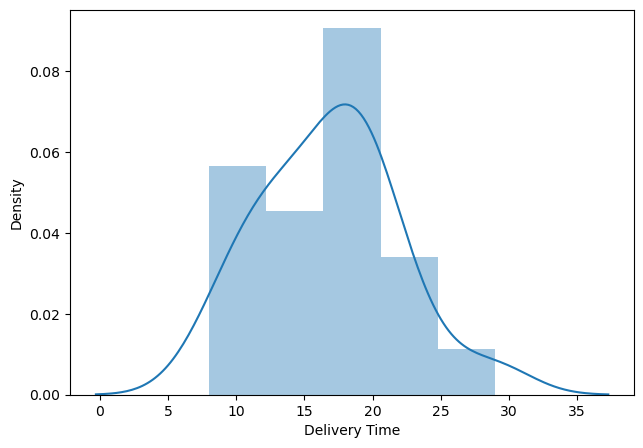

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Delivery Time"])

plt.show()

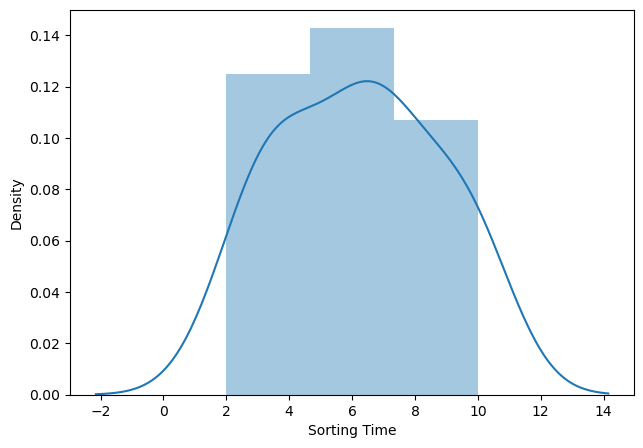

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df["Sorting Time"])

plt.show()

In [13]:
df=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [14]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [15]:
x=df[["sorting_time"]]
y=df["delivery_time"]

Text(0.5, 1.0, 'This is a Box plot For Shorting Time')

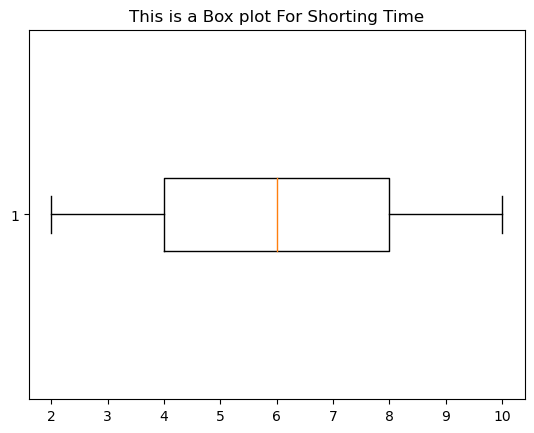

In [16]:
plt.boxplot(x,vert=False,widths=0.2)
plt.title("This is a Box plot For Shorting Time")

Text(0.5, 1.0, 'This is a Box plot For Delivery  Time')

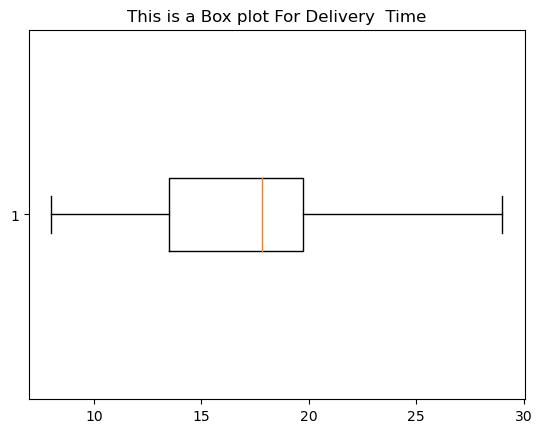

In [17]:
plt.boxplot(y,vert=False,widths=0.2)
plt.title("This is a Box plot For Delivery  Time")

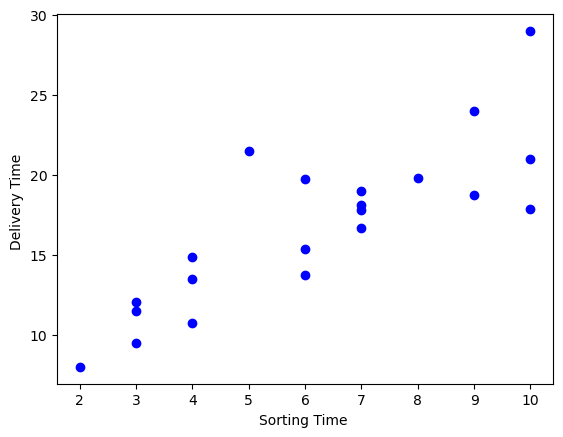

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.xlabel("Sorting Time ")
plt.ylabel("Delivery Time ")

plt.show()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

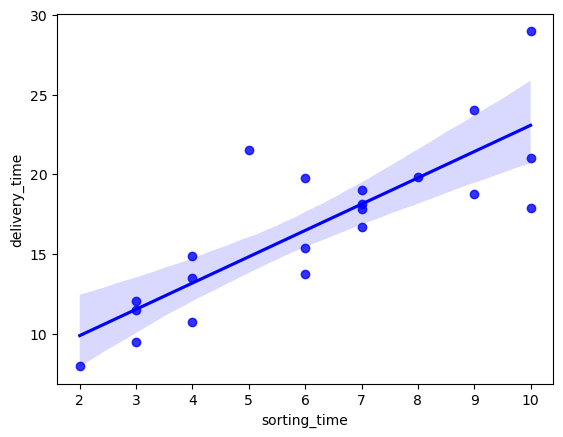

In [19]:
## correlation between two variables
import matplotlib.pyplot as plt
sns.regplot(x=df["sorting_time"],y=df["delivery_time"],color="blue")

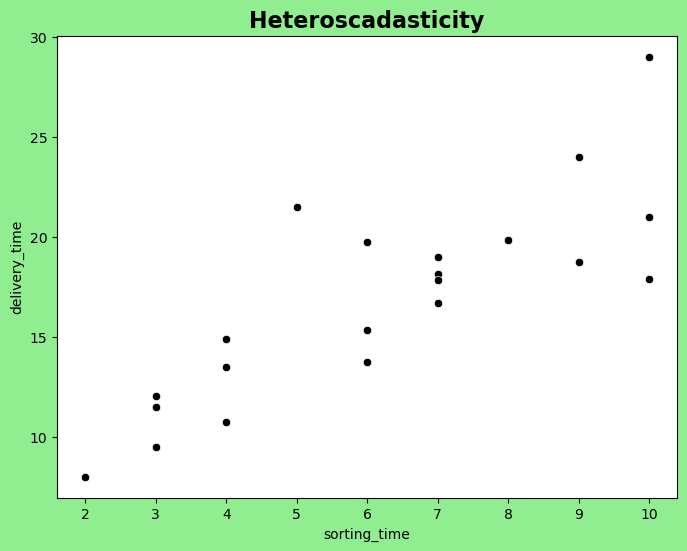

In [20]:
##Checking for Homoscedasticity or Hetroscedasticity
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['sorting_time'], y = df['delivery_time'],color="black")
plt.title('Heteroscadasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [21]:
df.var()

delivery_time    25.754619
sorting_time      6.461905
dtype: float64

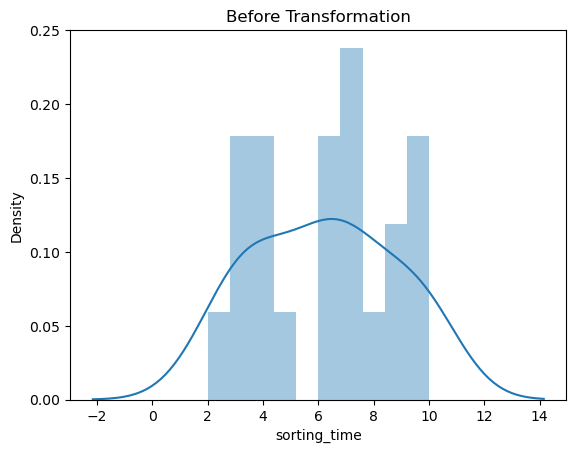

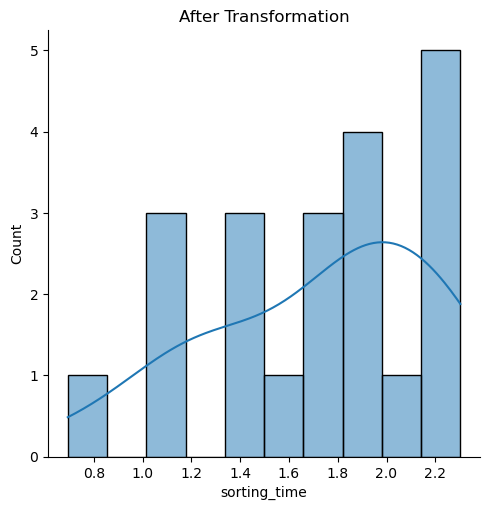

In [22]:
##Trying different transformation of data to estimate normal distribution and remove any skewness
Labels=["Before Transformation","After Transformation"]
sns.distplot(df['sorting_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['sorting_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

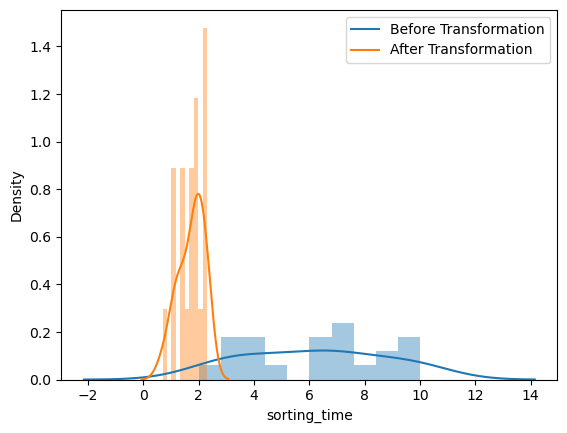

In [23]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['sorting_time'], bins = 10, kde = True)
sns.distplot(np.log(df['sorting_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

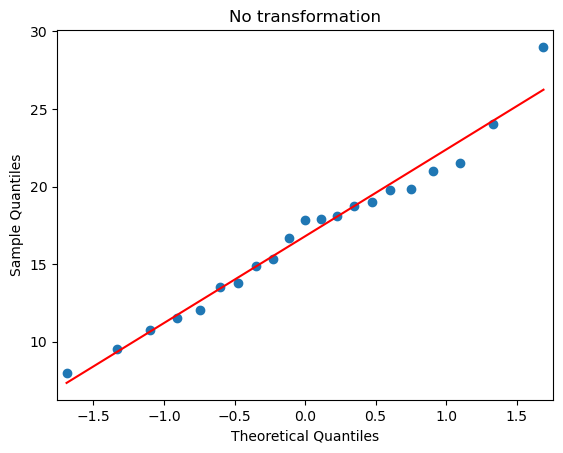

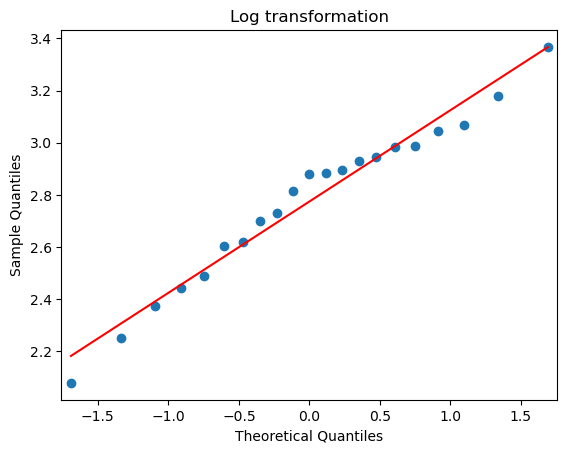

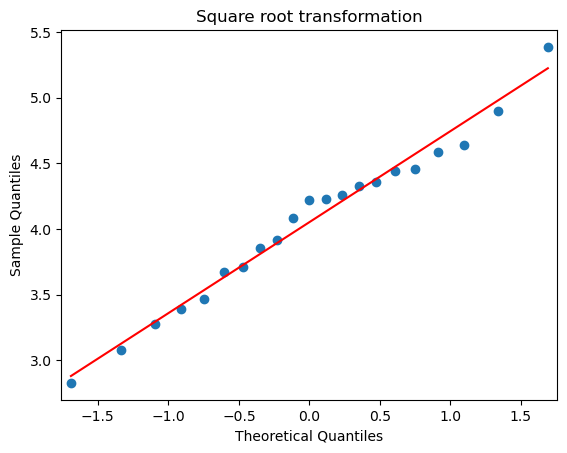

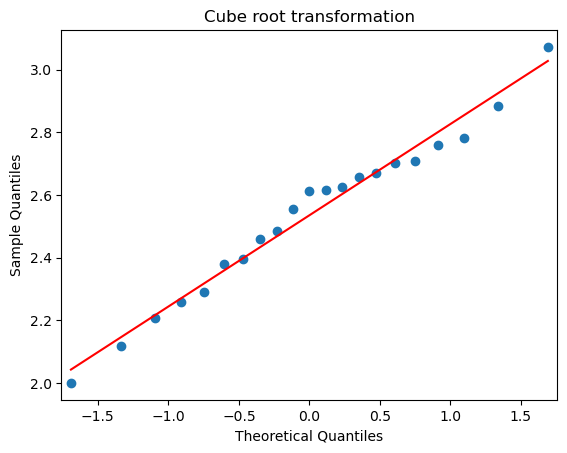

In [24]:
import statsmodels.api as smf
smf.qqplot(df['delivery_time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['delivery_time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['delivery_time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [25]:
## fitting a regression model
import statsmodels.formula.api as sm
model = sm.ols('delivery_time~sorting_time', data = df).fit()

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        11:12:53   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
##Square Root transformation on data
model1 = sm.ols('np.sqrt(delivery_time)~np.sqrt(sorting_time)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Wed, 12 Apr 2023   Prob (F-statistic):           8.48e-07
Time:                            11:13:23   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
##Cuberoot transformation on Data
model2 = sm.ols('np.cbrt(delivery_time)~np.cbrt(sorting_time)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(delivery_time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Wed, 12 Apr 2023   Prob (F-statistic):           4.90e-07
Time:                            11:14:11   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(sorting_time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
##Log transformation on Data
model3 = sm.ols('np.log(delivery_time)~np.cbrt(sorting_time)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.758
Model:                               OLS   Adj. R-squared:                  0.745
Method:                    Least Squares   F-statistic:                     59.39
Date:                   Wed, 12 Apr 2023   Prob (F-statistic):           2.91e-07
Time:                           11:15:56   Log-Likelihood:                 9.6413
No. Observations:                     21   AIC:                            -15.28
Df Residuals:                         19   BIC:                            -13.19
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9207      0.243      3.787      0.001       0.412       1.430
np.cbrt(sorting_time)     1.0305      0.134      7.707      0.000       0.751       1.310
==============================================================================
Omnibus:                        1.927   Durbin-Watson:                   1.290
Prob(Omnibus):                  0.382   Jarque-Bera (JB):                1.132
Skew:                           0.569   Prob(JB):                        0.568
Kurtosis:                       2.989   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
x=df[["sorting_time"]]
y=df["delivery_time"]

In [33]:
from sklearn.linear_model import LinearRegression# for import linear Regression FFormula....
LR=LinearRegression()
LR.fit(x,y)

LinearRegression()

In [34]:
Intercept=LR.intercept_.round(3)
Sorting_Time=(LR.coef_).round(3)

In [35]:
print(Intercept)
print(Sorting_Time)

6.583
[1.649]


In [36]:
## y_prediction values
model=LR.predict(x)

In [37]:
model

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

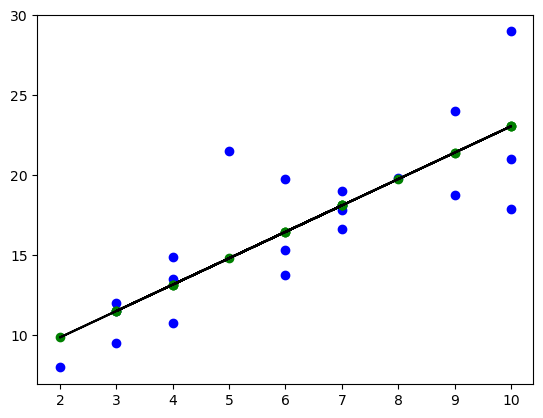

In [38]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model,color="green")
plt.plot(df["sorting_time"],model,color="black")
plt.show()

In [39]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y,model)
print("Mean Squared Error Will be : ",mse.round(3))
RSE=np.sqrt(mse).round(3)
print("Root mean Squared Error will be : ",np.sqrt(mse).round(3))
print("R Square value will be :",r2_score(y,model).round(3))

Mean Squared Error Will be :  7.793
Root mean Squared Error will be :  2.792
R Square value will be : 0.682


In [40]:
RSE

2.792

In [41]:
## model validiation
from sklearn.metrics import mean_squared_error
model1_pred_y =np.square(model1.predict(df['sorting_time']))
model2_pred_y =pow(model2.predict(df['sorting_time']),3)
model3_pred_y =np.exp(model3.predict(df['sorting_time']))

In [42]:
## for model1
from sklearn.metrics import mean_squared_error,r2_score
mse1=mean_squared_error(y,model1_pred_y)
print("Mean Squared Error Will be : ",mse1.round(3))
RSE1=np.sqrt(mse1).round(3)
print("Root Mean Squared Error Will be :",RSE1.round(3))
print("R Square value will be :",r2_score(y,model1_pred_y).round(3))

Mean Squared Error Will be :  7.63
Root Mean Squared Error Will be : 2.762
R Square value will be : 0.689


In [43]:
## for model2
from sklearn.metrics import mean_squared_error,r2_score
mse2=mean_squared_error(y,model2_pred_y)
print("Mean Squared Error Will be : ",mse2.round(3))
RSE2=np.sqrt(mse2).round(3)
print("Root Mean Squared Error Will be :",RSE2.round(3))
print("R Square value will be :",r2_score(y,model2_pred_y).round(3))

Mean Squared Error Will be :  7.593
Root Mean Squared Error Will be : 2.756
R Square value will be : 0.69


In [44]:
## for model3
from sklearn.metrics import mean_squared_error,r2_score
mse3=mean_squared_error(y,model3_pred_y)
print("Mean Squared Error Will be : ",mse3.round(3))
RSE3=np.sqrt(mse3).round(3)
print("Root Mean Squared Error Will be :",RSE3.round(3))
print("R Square value will be :",r2_score(y,model3_pred_y).round(3))

Mean Squared Error Will be :  7.783
Root Mean Squared Error Will be : 2.79
R Square value will be : 0.683


In [45]:
rmse={'model': RSE, 'model1': RSE1, 'model2': RSE2, 'model3' : RSE3}
min(rmse,key=rmse.get)

'model2'

In [46]:
## predicting values
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['sortin_time'] = df.sorting_time
predicted2['delivery_time'] = df.delivery_time
predicted2['Predicted_delivery_time_Hike'] = pd.DataFrame(model)
predicted2

,sortin_time,delivery_time,Predicted_delivery_time_Hike
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


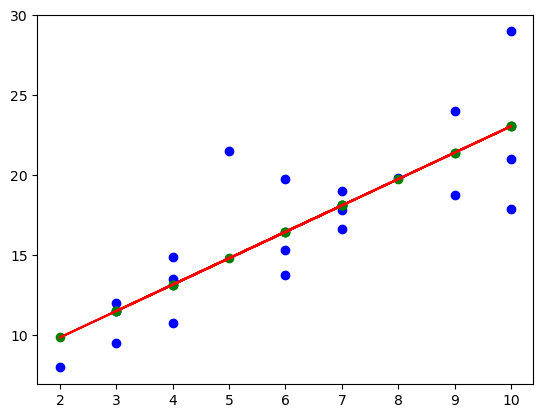

In [47]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model,color="green")
plt.plot(df["sorting_time"],model,color="red")
plt.show()

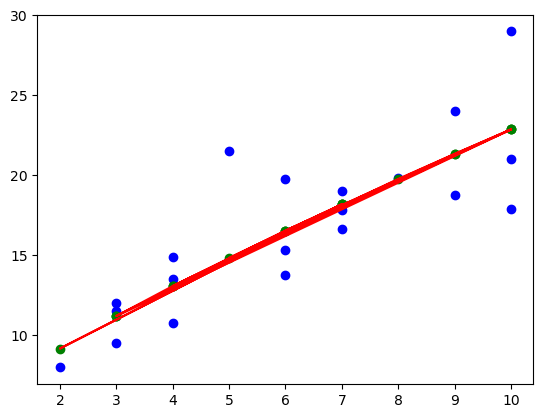

In [48]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model1_pred_y,color="green")
plt.plot(df["sorting_time"],model1_pred_y,color="red")
plt.show()

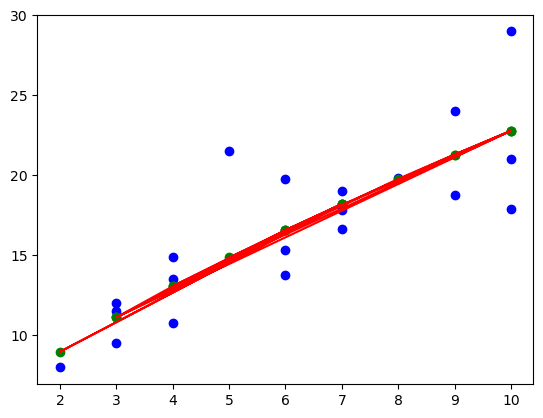

In [49]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model2_pred_y,color="green")
plt.plot(df["sorting_time"],model2_pred_y,color="red")
plt.show()

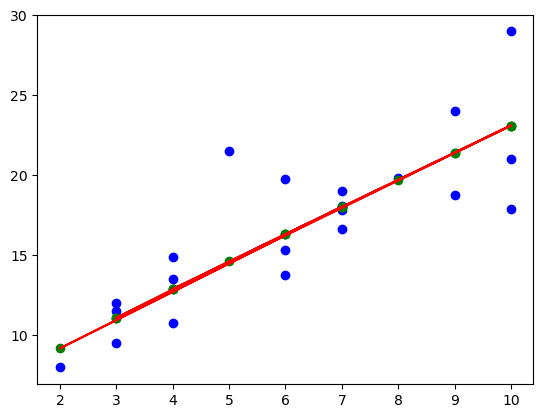

In [51]:
import matplotlib.pyplot as plt
plt.scatter(x=df["sorting_time"],y=df["delivery_time"],color="blue")
plt.scatter(x=df["sorting_time"],y=model3_pred_y,color="green")
plt.plot(df["sorting_time"],model3_pred_y,color="red")
plt.show()
